### Prerequisites and Dataset Download

In [44]:
# dataset
# https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?resource=download

In [45]:
#!git clone https://github.com/stvschmdt/ne_ds5230.git

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

In [47]:
data = pd.read_csv('cbb.csv')
data.rename(mapper={"TEAM": "Team", "CONF": "Conference", "G": "Number of Games", "W": "Number of Wins", "ADJOE": "Adjusted Offensive Efficiency", "ADJDE": "Adjusted Defensive Efficiency", "TOR": "Turnover Rate", "TORD": "Steal Rate",
                    "EFG_O": "Percent Effective Field Goals Shot", "EFG_D": "Percent Effective Field Goals Allowed", "ORB": "Offensive Rebound Rate", "DRB": "Offensive Rebound Rate Allowed", "FTR": "Free Throw Rate",
                    "FTRD": "Free Throw Rate Allowed", "2P_O": "Two Point Shooting Percentage", "2P_D": "Two Point Shooting Percentage Allowed", "3P_O": "Three Point Shooting Percentage", "3P_D": "Three Point Shooting Percentage Allowed",
                    "ADJ_T": "Adjusted Tempo", "WAB": "Wins Above Bubble", "POSTSEASON": "Postseason", "SEED": "Seed", "YEAR": "Year"}, inplace=True, axis=1)

In [48]:
data.columns

Index(['Team', 'Conference', 'Number of Games', 'Number of Wins',
       'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency',
       'BARTHAG', 'Percent Effective Field Goals Shot',
       'Percent Effective Field Goals Allowed', 'Turnover Rate', 'Steal Rate',
       'Offensive Rebound Rate', 'Offensive Rebound Rate Allowed',
       'Free Throw Rate', 'Free Throw Rate Allowed',
       'Two Point Shooting Percentage',
       'Two Point Shooting Percentage Allowed',
       'Three Point Shooting Percentage',
       'Three Point Shooting Percentage Allowed', 'Adjusted Tempo',
       'Wins Above Bubble', 'Postseason', 'Seed', 'Year'],
      dtype='object')

# Definitions

**Adjusted Offensive Efficiency-** An estimate of the offensive efficiency (points scored per 100 possessions) of a team

**Adjusted Defensive Efficiency-** An estimate of the defensive efficiency (points allowed per 100 possessions) of a team

**BARTHAG-** Power Rating (Chance of beating an average Division I team)

**Adjusted Tempo-** An estimate of the tempo (possessions per 40 minutes) a team would have against the team

**Wins Above Bubble-** The bubble refers to the cut off between making the NCAA March Madness Tournament and not

**Postseason-** Round where the given team was eliminated or where their season ended (Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year))

**Seed-** Seed in the NCAA March Madness Tournament

### Dataset Info

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Team                                     2455 non-null   object 
 1   Conference                               2455 non-null   object 
 2   Number of Games                          2455 non-null   int64  
 3   Number of Wins                           2455 non-null   int64  
 4   Adjusted Offensive Efficiency            2455 non-null   float64
 5   Adjusted Defensive Efficiency            2455 non-null   float64
 6   BARTHAG                                  2455 non-null   float64
 7   Percent Effective Field Goals Shot       2455 non-null   float64
 8   Percent Effective Field Goals Allowed    2455 non-null   float64
 9   Turnover Rate                            2455 non-null   float64
 10  Steal Rate                               2455 no

In [50]:
data.Postseason.unique()

array(['2ND', 'Champions', 'E8', 'F4', nan, 'R32', 'R64', 'R68', 'S16'],
      dtype=object)

In [51]:
data.describe()

,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,Steal Rate,Offensive Rebound Rate,...,Free Throw Rate,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Seed,Year
count,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,...,2455.000000,2455.00000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,476.000000,2455.000000
mean,31.492464,16.284318,103.304481,103.304603,0.493957,49.805132,50.001385,18.763055,18.689572,29.875642,...,35.989776,36.26998,48.802281,48.976660,34.406395,34.598737,67.812301,-7.802485,8.802521,2016.007332
std,2.657401,6.610960,7.376981,6.605318,0.256244,3.143061,2.939602,2.090595,2.201749,4.134332,...,5.247820,6.24590,3.384468,3.340546,2.789434,2.415766,3.277622,6.965736,4.676354,1.999375
min,15.000000,0.000000,76.600000,84.000000,0.005000,39.200000,39.600000,11.900000,10.200000,15.000000,...,21.600000,21.80000,37.700000,37.700000,24.900000,27.100000,57.200000,-25.200000,1.000000,2013.000000
25%,30.000000,11.000000,98.300000,98.500000,0.282200,47.750000,48.000000,17.300000,17.200000,27.100000,...,32.400000,31.90000,46.500000,46.700000,32.500000,33.000000,65.700000,-13.000000,5.000000,2014.000000
50%,31.000000,16.000000,103.000000,103.500000,0.475000,49.700000,50.000000,18.700000,18.600000,29.900000,...,35.800000,35.80000,48.700000,49.000000,34.400000,34.600000,67.800000,-8.300000,9.000000,2016.000000
75%,33.000000,21.000000,108.000000,107.900000,0.712200,51.900000,52.000000,20.100000,20.100000,32.600000,...,39.500000,40.20000,51.000000,51.300000,36.300000,36.200000,70.000000,-3.150000,13.000000,2018.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,27.100000,28.500000,43.600000,...,58.600000,60.70000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000


In [52]:
data.groupby('Team').count()

,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,Steal Rate,...,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year
Team,,,,,,,,,,,,,,,,,,,,,
Abilene Christian,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,1,1,6
Air Force,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,0,0,7
Akron,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Alabama,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Alabama A&M,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wright St.,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Wyoming,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,1,1,7
Xavier,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,5,5,7


In [53]:
data.head()

,Team,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,...,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


### Statistics

In [54]:
averages = data[['Conference', 'Number of Games', 'Number of Wins', 'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency', 'BARTHAG', 'Percent Effective Field Goals Shot', 'Percent Effective Field Goals Allowed',
       'Turnover Rate', 'Steal Rate', 'Offensive Rebound Rate', 'Offensive Rebound Rate Allowed',
       'Free Throw Rate', 'Free Throw Rate Allowed',
       'Two Point Shooting Percentage',
       'Two Point Shooting Percentage Allowed',
       'Three Point Shooting Percentage',
       'Three Point Shooting Percentage Allowed', 'Adjusted Tempo',
       'Wins Above Bubble']].groupby('Conference').mean()

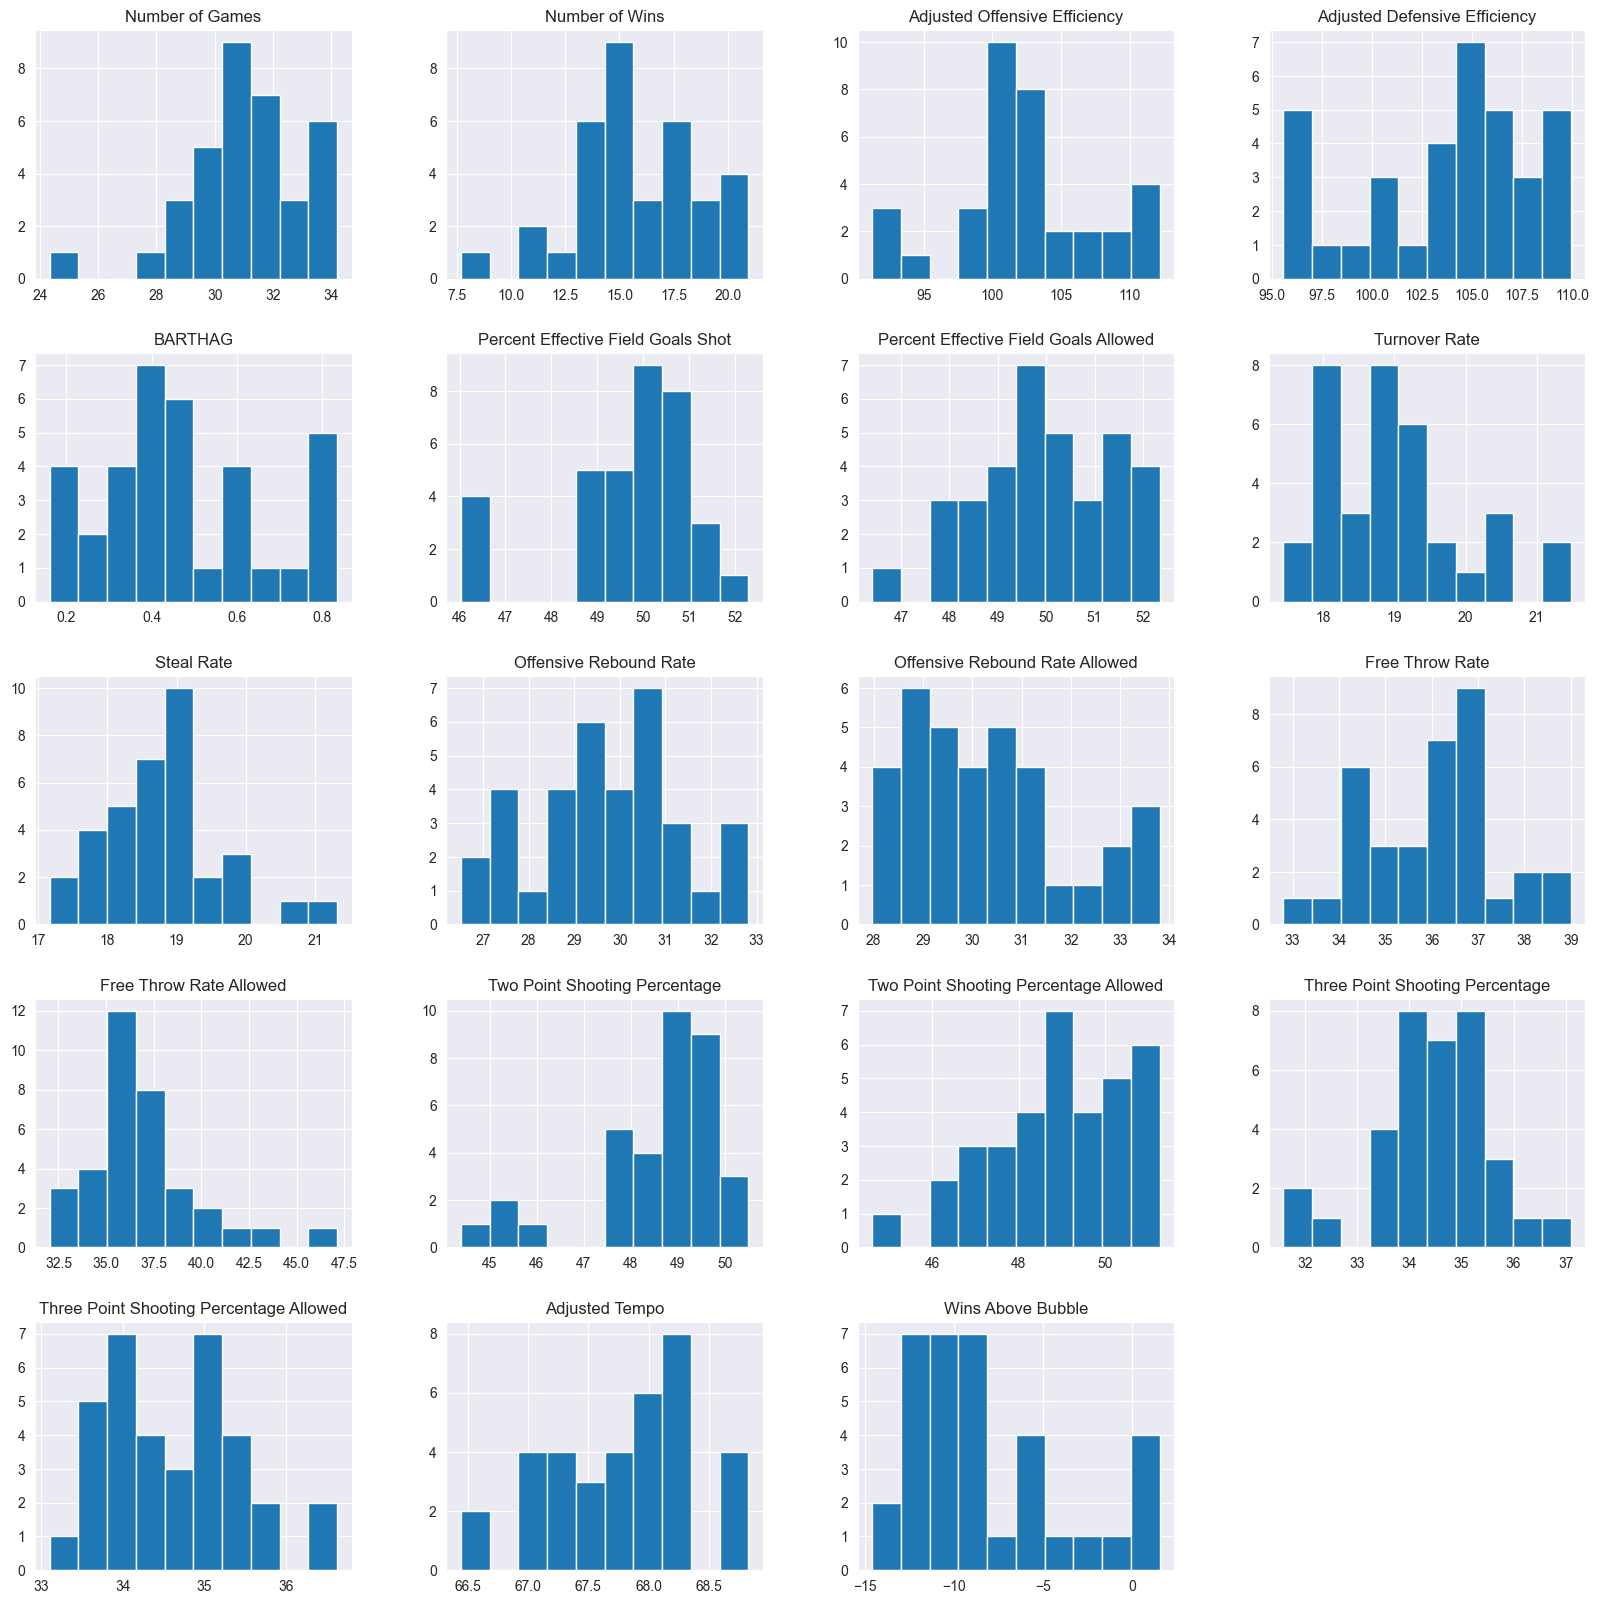

In [55]:
averages.hist(figsize=(20,20))
plt.show()

In [56]:
first_rounds = data[(data.Postseason =='R64') | (data.Postseason == 'R32') | (data.Postseason =='2ND') ]

In [57]:
final_rounds = data[(data.Postseason == 'Champions') | (data.Postseason == 'F4') | (data.Postseason == 'E8') | (data.Postseason == 'S16')]

In [58]:
final_rounds = data[(data.Postseason == 'Champions') | (data.Postseason == 'F4') | (data.Postseason == 'E8') | (data.Postseason == 'S16')]

In [59]:
final_rounds

,Team,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,...,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


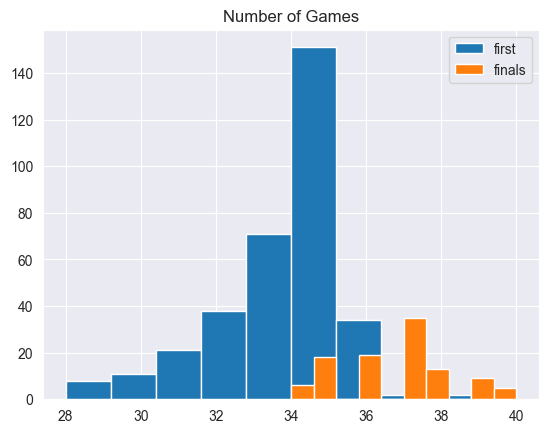

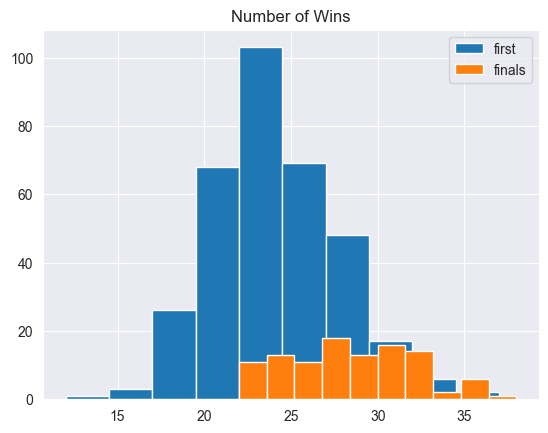

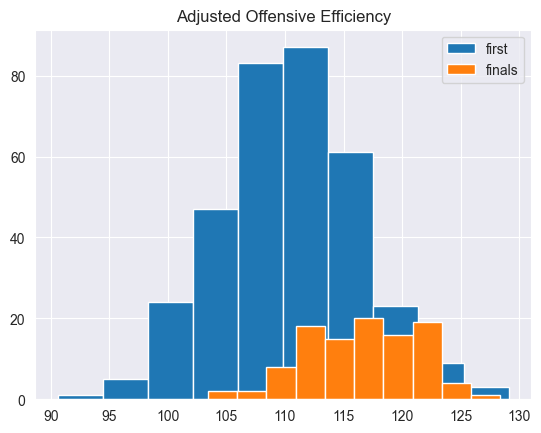

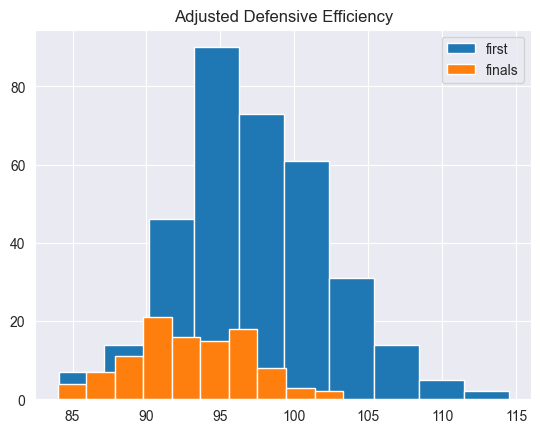

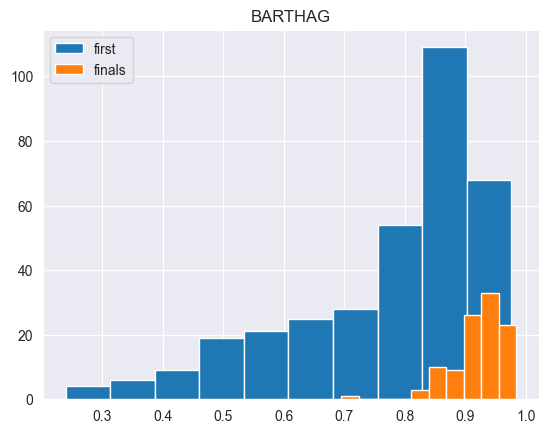

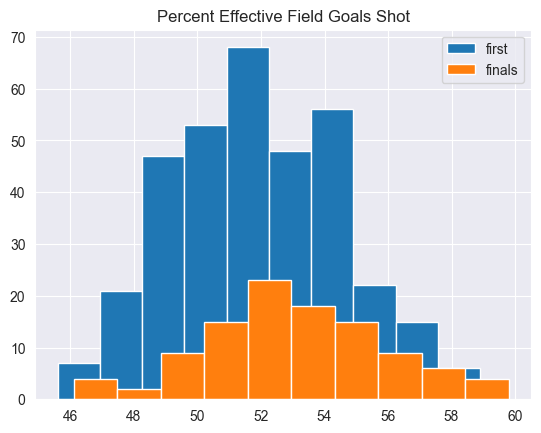

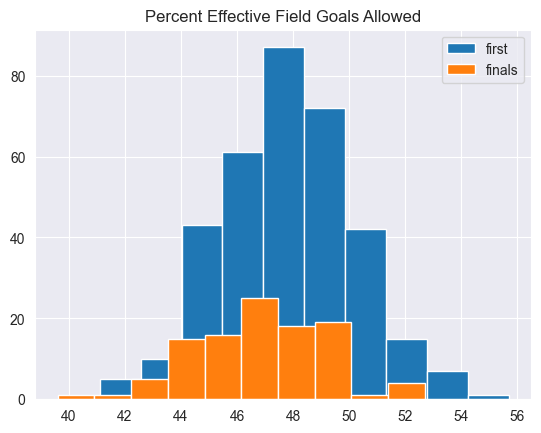

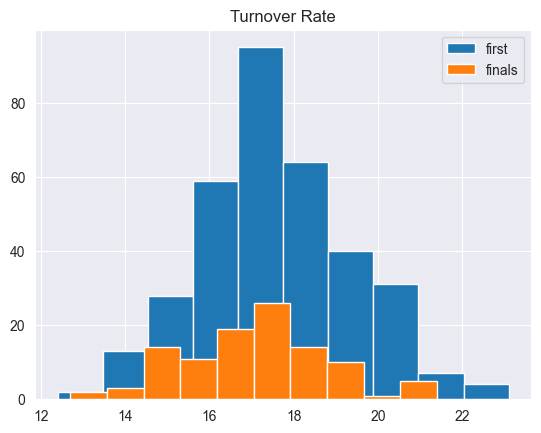

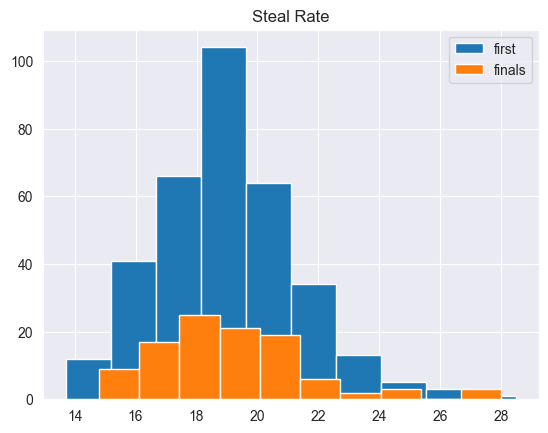

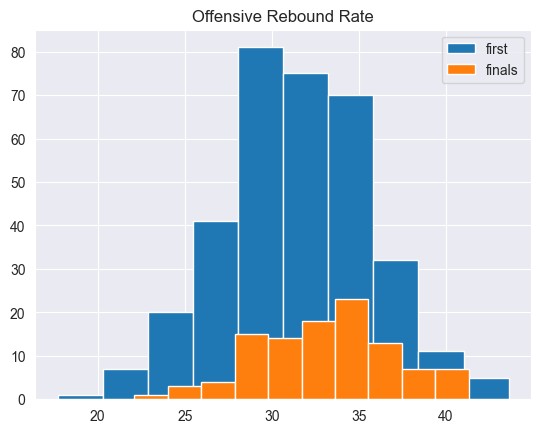

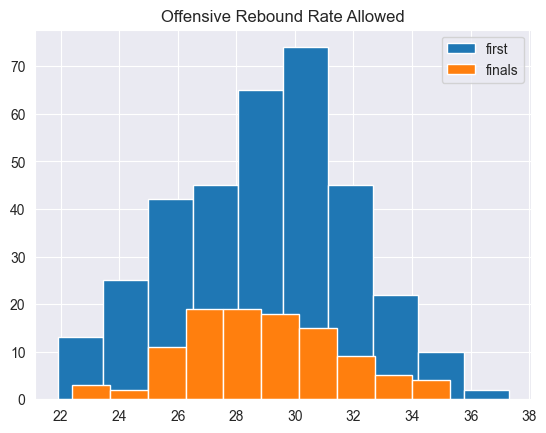

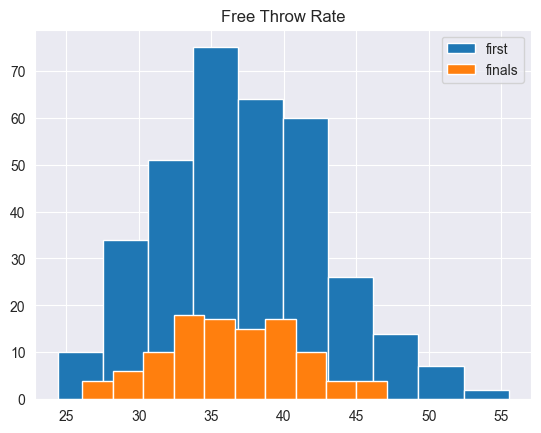

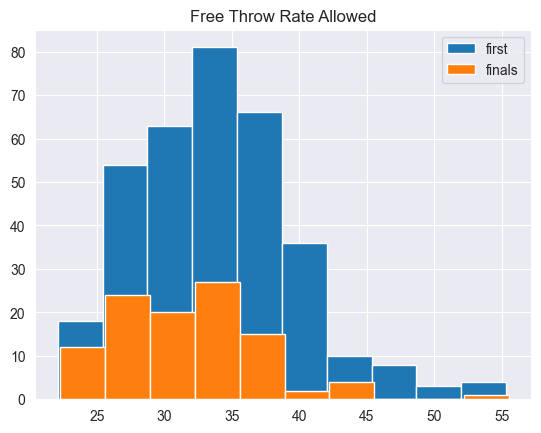

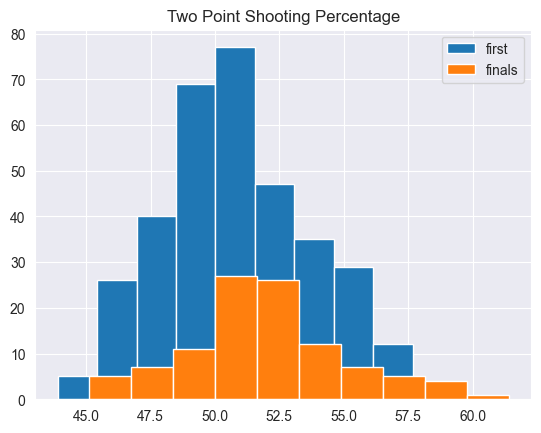

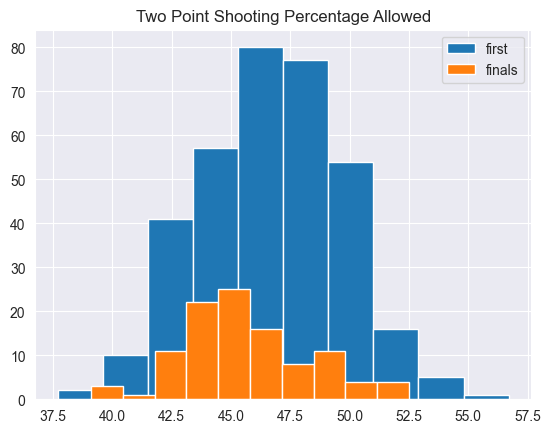

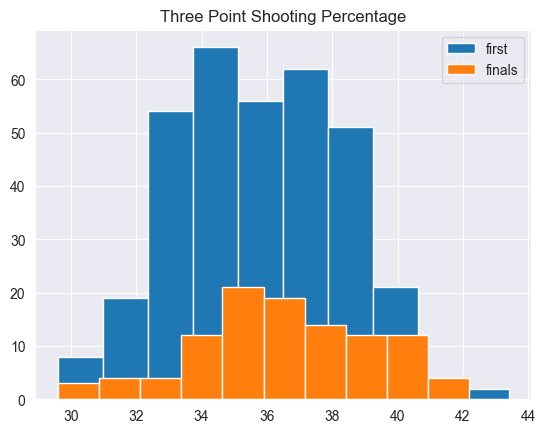

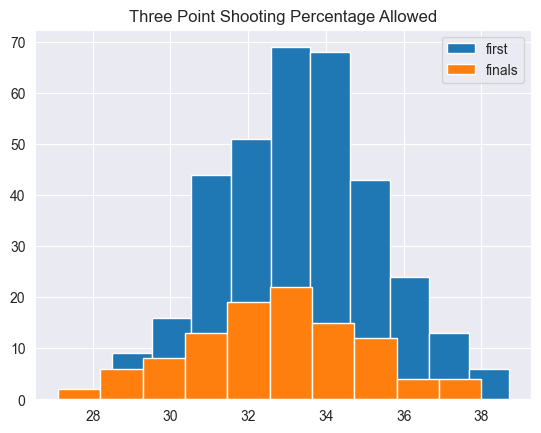

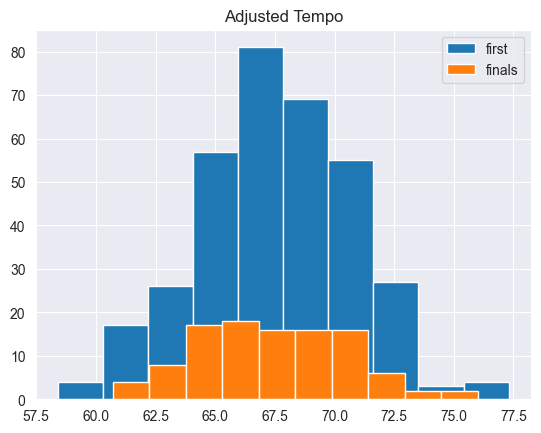

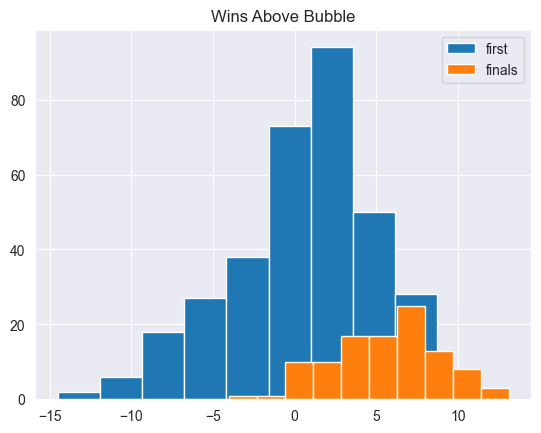

In [60]:
numerics = ['Number of Games', 'Number of Wins', 'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency',
            'BARTHAG', 'Percent Effective Field Goals Shot', 'Percent Effective Field Goals Allowed',
            'Turnover Rate', 'Steal Rate', 'Offensive Rebound Rate', 'Offensive Rebound Rate Allowed',
            'Free Throw Rate', 'Free Throw Rate Allowed', 'Two Point Shooting Percentage',
            'Two Point Shooting Percentage Allowed', 'Three Point Shooting Percentage',
            'Three Point Shooting Percentage Allowed', 'Adjusted Tempo',
            'Wins Above Bubble']
for col in numerics:
    plt.hist(first_rounds[col], label='first')
    plt.hist(final_rounds[col], label='finals')
    plt.legend()
    plt.title('{}'.format(col))
    plt.show()

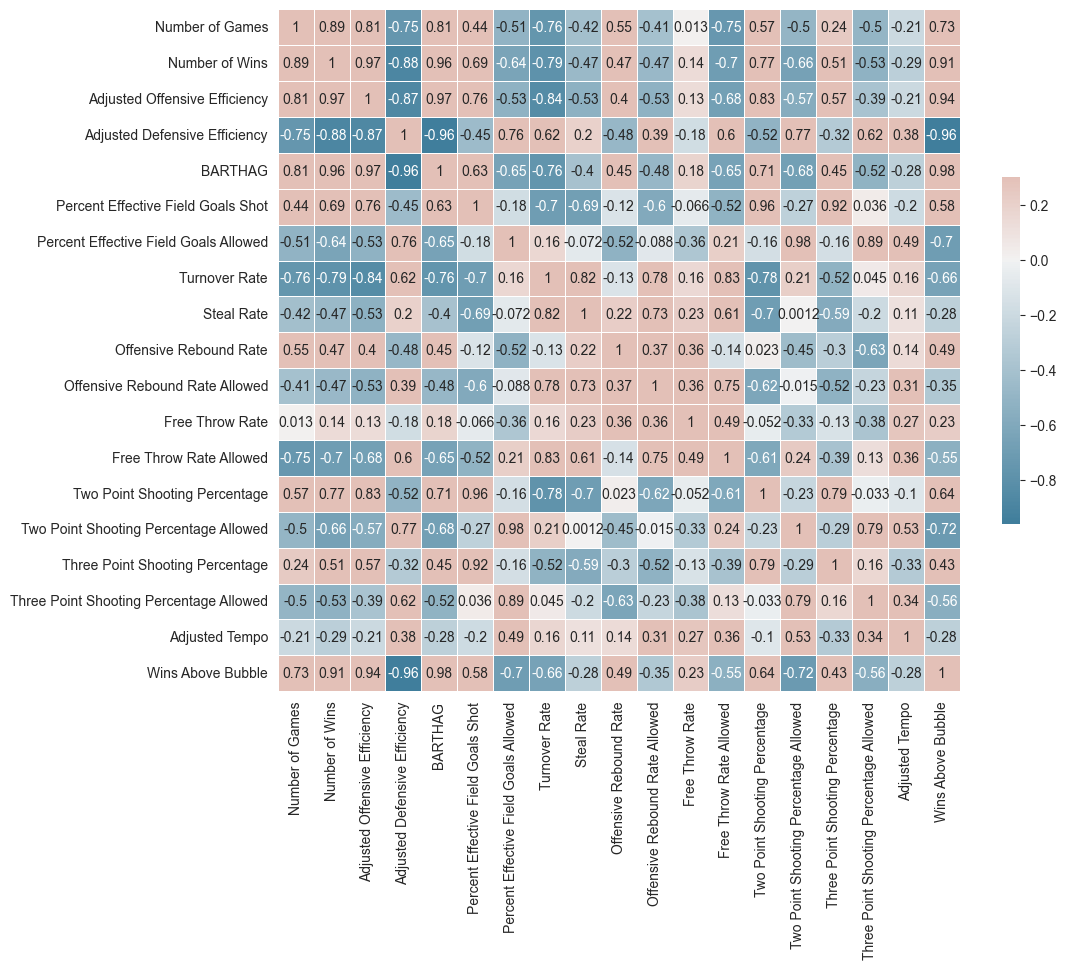

In [61]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(averages.corr(), annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

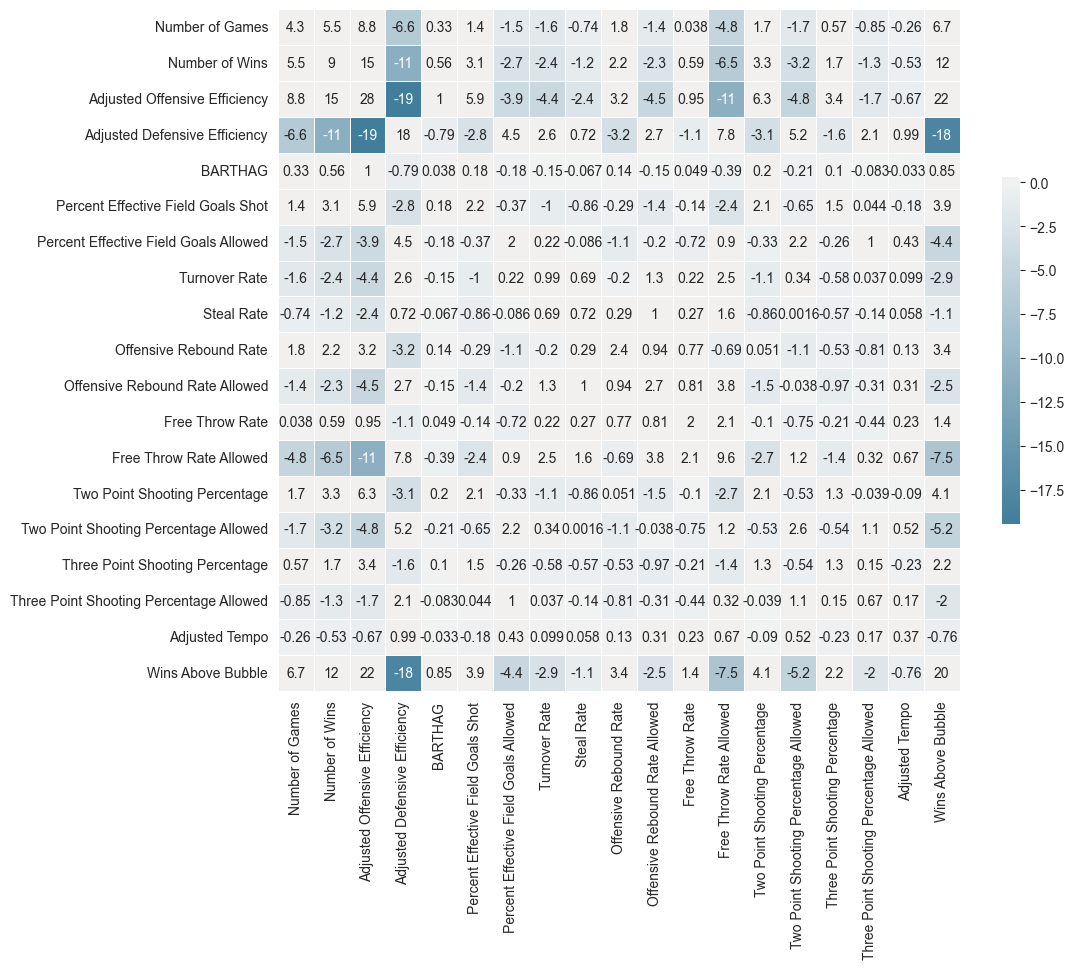

In [62]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(averages.cov(), annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

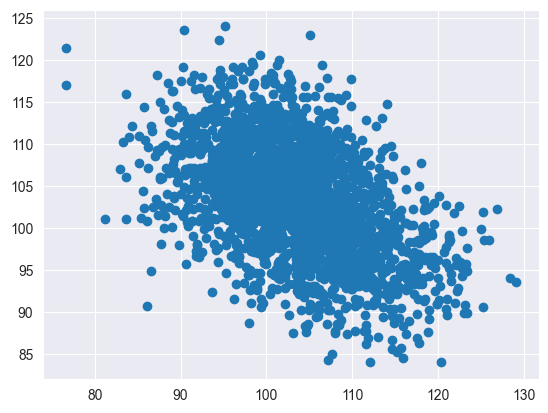

In [63]:
plt.scatter(data['Adjusted Offensive Efficiency'], data['Adjusted Defensive Efficiency'])
plt.show()

In [64]:
best_mean = final_rounds[numerics].mean()['Adjusted Offensive Efficiency']

In [65]:
one_std = final_rounds[numerics].std()['Adjusted Offensive Efficiency']

In [66]:
best_mean, one_std

(116.60857142857142, 4.817119197470348)

In [67]:
best_adjoe = final_rounds[numerics].mean()['Adjusted Offensive Efficiency']

In [68]:
close = []
for idx, team in first_rounds.iterrows():
    if team['Adjusted Offensive Efficiency'] > (best_mean + one_std):
        print(team['Team'], best_mean+one_std, team['Adjusted Offensive Efficiency'], team["Seed"], team["Year"])

North Carolina 121.42569062604177 123.3 1.0 2016
Wisconsin 121.42569062604177 129.1 1.0 2015
Michigan 121.42569062604177 121.5 4.0 2013
Duke 121.42569062604177 122.1 2.0 2017
Villanova 121.42569062604177 121.9 1.0 2015
Villanova 121.42569062604177 122.2 1.0 2017
Kentucky 121.42569062604177 123.2 4.0 2016
Creighton 121.42569062604177 125.2 3.0 2014
Michigan St. 121.42569062604177 122.5 2.0 2016
Oklahoma St. 121.42569062604177 126.8 10.0 2017
Marquette 121.42569062604177 121.8 10.0 2017
Duke 121.42569062604177 125.9 3.0 2014


In [69]:
pd.cut(data['Adjusted Offensive Efficiency'], 3, labels=["bad", "ok", "good"])

0       good
1       good
2       good
3       good
4       good
        ... 
2450      ok
2451    good
2452      ok
2453    good
2454      ok
Name: Adjusted Offensive Efficiency, Length: 2455, dtype: category
Categories (3, object): ['bad' < 'ok' < 'good']

In [70]:
pd.cut(data['Adjusted Offensive Efficiency'], 3, labels=["bad", "ok", "good"]).value_counts()

Adjusted Offensive Efficiency
ok      1902
good     314
bad      239
Name: count, dtype: int64

In [94]:
pd.cut(data['Adjusted Defensive Efficiency'], 3, labels=["good", "ok", "bad"])

0       good
1       good
2       good
3       good
4       good
        ... 
2450    good
2451    good
2452    good
2453    good
2454    good
Name: Adjusted Defensive Efficiency, Length: 2455, dtype: category
Categories (3, object): ['good' < 'ok' < 'bad']

In [95]:
pd.cut(data['Adjusted Defensive Efficiency'], 3, labels=["good", "ok", "bad"]).value_counts()

Adjusted Defensive Efficiency
ok      1630
good     484
bad      341
Name: count, dtype: int64

In [96]:
data[['Conference'] + numerics].groupby('Conference').mean().sort_values(by='Adjusted Offensive Efficiency', ascending=False)

,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,Steal Rate,Offensive Rebound Rate,Offensive Rebound Rate Allowed,Free Throw Rate,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble
Conference,,,,,,,,,,,,,,,,,,,
B12,34.157143,20.957143,112.184286,95.584286,0.834934,50.701429,48.261429,18.212857,19.358571,32.821429,30.651429,37.102857,35.238571,49.718571,46.838571,35.027143,33.962857,67.837143,1.532857
ACC,34.205882,20.833333,111.776471,96.393137,0.809494,50.942157,48.218627,17.516667,18.226471,31.881373,29.891176,35.644118,32.037255,50.087255,47.079412,35.008824,33.494118,67.176471,0.453922
BE,33.746667,20.426667,111.068000,96.610667,0.802155,51.190667,48.889333,18.112000,19.121333,30.966667,29.656000,36.578667,34.645333,50.506667,47.892000,34.909333,33.774667,67.837333,0.114667
B10,34.170213,20.648936,111.055319,95.886170,0.810387,50.641489,47.942553,17.439362,18.155319,31.087234,29.013830,34.563830,32.194681,49.591489,46.538298,34.971277,33.743617,66.937234,0.287234
SEC,33.704082,19.551020,109.404082,96.762245,0.771296,49.868367,47.907143,18.591837,19.111224,32.457143,30.911224,38.597959,36.637755,49.112245,46.618367,34.136735,33.488776,67.914286,-1.342857
P12,33.404762,19.511905,109.057143,98.389286,0.737407,51.060714,48.941667,18.032143,17.855952,30.575000,29.089286,36.711905,33.610714,50.063095,47.522619,35.350000,34.505952,68.283333,-2.222619
Amer,33.044776,18.746269,106.541791,99.308955,0.652463,49.492537,47.944776,18.413433,18.667164,32.237313,30.682090,35.516418,33.492537,48.622388,46.588060,34.010448,33.507463,67.432836,-4.144776
WCC,32.028986,17.623188,106.437681,101.495652,0.592357,50.879710,49.889855,17.892754,17.753623,29.472464,28.594203,36.015942,36.201449,49.453623,48.656522,35.698551,34.800000,67.233333,-5.818841
A10,32.585859,17.757576,105.659596,100.141414,0.629086,49.884848,49.315152,18.315152,18.971717,29.697980,29.545455,36.036364,35.368687,49.397980,48.461616,33.807071,33.908081,67.737374,-5.520202


In [97]:
final_rounds.groupby('Conference').size().sort_values(ascending=False)

Conference
ACC     23
B10     17
B12     15
SEC     14
P12     13
BE       8
WCC      4
Amer     3
MVC      3
A10      2
MWC      2
ASun     1
dtype: int64

In [98]:
final_rounds[final_rounds.Conference == 'B12'].sort_values(by='Adjusted Offensive Efficiency', ascending=False)

,Team,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,...,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year
46,Kansas,B12,39,31,122.1,96.4,0.9385,57.5,49.1,16.6,...,24.6,55.6,48.6,40.1,33.3,69.9,8.2,F4,1.0,2018
23,Kansas,B12,36,31,121.5,94.5,0.9472,56.1,48.1,17.6,...,30.0,53.6,45.3,40.4,35.6,71.4,11.0,E8,1.0,2017
2419,Iowa St.,B12,35,23,121.4,98.6,0.9162,57.1,49.8,15.7,...,24.9,56.7,49.5,38.7,33.5,72.3,3.6,S16,3.0,2016
22,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
2422,West Virginia,B12,37,26,120.9,95.8,0.9353,50.4,49.9,16.5,...,44.1,48.8,45.4,35.3,38.0,71.2,4.6,S16,5.0,2018
2444,Baylor,B12,36,24,119.2,99.5,0.8885,51.3,48.7,17.8,...,32.3,48.3,46.4,38.0,35.6,62.9,3.1,S16,6.0,2014
2440,Iowa St.,B12,36,28,118.6,98.8,0.8903,54.2,47.7,14.5,...,30.7,54.4,46.0,35.8,34.1,71.6,7.5,S16,3.0,2014
45,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,...,28.3,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016
2420,Baylor,B12,34,27,116.4,93.9,0.9226,52.5,46.1,20.6,...,30.1,52.2,45.0,35.3,32.2,65.1,7.9,S16,3.0,2017
2421,West Virginia,B12,37,28,115.4,89.3,0.9498,51.3,48.8,17.0,...,42.5,49.8,46.5,36.2,35.3,72.2,6.4,S16,4.0,2017


In [99]:
first_rounds[numerics].mean() - final_rounds[numerics].mean()

Number of Games                           -3.066472
Number of Wins                            -4.515841
Adjusted Offensive Efficiency             -6.324023
Adjusted Defensive Efficiency              4.218251
BARTHAG                                   -0.146538
Percent Effective Field Goals Shot        -1.215879
Percent Effective Field Goals Allowed      0.981341
Turnover Rate                              0.502060
Steal Rate                                -0.213644
Offensive Rebound Rate                    -1.639572
Offensive Rebound Rate Allowed             0.026200
Free Throw Rate                            0.764917
Free Throw Rate Allowed                    2.149990
Two Point Shooting Percentage             -1.207988
Two Point Shooting Percentage Allowed      1.037026
Three Point Shooting Percentage           -0.817959
Three Point Shooting Percentage Allowed    0.542352
Adjusted Tempo                             0.211740
Wins Above Bubble                         -5.011973
dtype: float

In [100]:
first_rounds[numerics].std() - final_rounds[numerics].std()

Number of Games                            0.381813
Number of Wins                             0.015954
Adjusted Offensive Efficiency              1.030244
Adjusted Defensive Efficiency              1.110305
BARTHAG                                    0.115371
Percent Effective Field Goals Shot        -0.196321
Percent Effective Field Goals Allowed      0.009733
Turnover Rate                              0.107368
Steal Rate                                -0.240370
Offensive Rebound Rate                     0.431728
Offensive Rebound Rate Allowed             0.339471
Free Throw Rate                            1.082821
Free Throw Rate Allowed                    0.553867
Two Point Shooting Percentage             -0.155829
Two Point Shooting Percentage Allowed      0.250968
Three Point Shooting Percentage           -0.138631
Three Point Shooting Percentage Allowed   -0.291423
Adjusted Tempo                             0.088722
Wins Above Bubble                          1.208691
dtype: float

In [101]:
data[['Conference'] + numerics].groupby('Conference').mean().sort_values(by='Adjusted Offensive Efficiency', ascending=False)

,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,Steal Rate,Offensive Rebound Rate,Offensive Rebound Rate Allowed,Free Throw Rate,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble
Conference,,,,,,,,,,,,,,,,,,,
B12,34.157143,20.957143,112.184286,95.584286,0.834934,50.701429,48.261429,18.212857,19.358571,32.821429,30.651429,37.102857,35.238571,49.718571,46.838571,35.027143,33.962857,67.837143,1.532857
ACC,34.205882,20.833333,111.776471,96.393137,0.809494,50.942157,48.218627,17.516667,18.226471,31.881373,29.891176,35.644118,32.037255,50.087255,47.079412,35.008824,33.494118,67.176471,0.453922
BE,33.746667,20.426667,111.068000,96.610667,0.802155,51.190667,48.889333,18.112000,19.121333,30.966667,29.656000,36.578667,34.645333,50.506667,47.892000,34.909333,33.774667,67.837333,0.114667
B10,34.170213,20.648936,111.055319,95.886170,0.810387,50.641489,47.942553,17.439362,18.155319,31.087234,29.013830,34.563830,32.194681,49.591489,46.538298,34.971277,33.743617,66.937234,0.287234
SEC,33.704082,19.551020,109.404082,96.762245,0.771296,49.868367,47.907143,18.591837,19.111224,32.457143,30.911224,38.597959,36.637755,49.112245,46.618367,34.136735,33.488776,67.914286,-1.342857
P12,33.404762,19.511905,109.057143,98.389286,0.737407,51.060714,48.941667,18.032143,17.855952,30.575000,29.089286,36.711905,33.610714,50.063095,47.522619,35.350000,34.505952,68.283333,-2.222619
Amer,33.044776,18.746269,106.541791,99.308955,0.652463,49.492537,47.944776,18.413433,18.667164,32.237313,30.682090,35.516418,33.492537,48.622388,46.588060,34.010448,33.507463,67.432836,-4.144776
WCC,32.028986,17.623188,106.437681,101.495652,0.592357,50.879710,49.889855,17.892754,17.753623,29.472464,28.594203,36.015942,36.201449,49.453623,48.656522,35.698551,34.800000,67.233333,-5.818841
A10,32.585859,17.757576,105.659596,100.141414,0.629086,49.884848,49.315152,18.315152,18.971717,29.697980,29.545455,36.036364,35.368687,49.397980,48.461616,33.807071,33.908081,67.737374,-5.520202


In [102]:
data.columns

Index(['Team', 'Conference', 'Number of Games', 'Number of Wins',
       'Adjusted Offensive Efficiency', 'Adjusted Defensive Efficiency',
       'BARTHAG', 'Percent Effective Field Goals Shot',
       'Percent Effective Field Goals Allowed', 'Turnover Rate', 'Steal Rate',
       'Offensive Rebound Rate', 'Offensive Rebound Rate Allowed',
       'Free Throw Rate', 'Free Throw Rate Allowed',
       'Two Point Shooting Percentage',
       'Two Point Shooting Percentage Allowed',
       'Three Point Shooting Percentage',
       'Three Point Shooting Percentage Allowed', 'Adjusted Tempo',
       'Wins Above Bubble', 'Postseason', 'Seed', 'Year', 'Categorical ADJDE',
       'Categorical ADJOE'],
      dtype='object')

In [103]:
final_rounds.groupby('Conference').size().sort_values(ascending=False)

Conference
ACC     23
B10     17
B12     15
SEC     14
P12     13
BE       8
WCC      4
Amer     3
MVC      3
A10      2
MWC      2
ASun     1
dtype: int64

In [104]:
final_rounds[final_rounds.Conference == 'B12'].sort_values(by='Adjusted Offensive Efficiency', ascending=False)

,Team,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,...,Free Throw Rate Allowed,Two Point Shooting Percentage,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year
46,Kansas,B12,39,31,122.1,96.4,0.9385,57.5,49.1,16.6,...,24.6,55.6,48.6,40.1,33.3,69.9,8.2,F4,1.0,2018
23,Kansas,B12,36,31,121.5,94.5,0.9472,56.1,48.1,17.6,...,30.0,53.6,45.3,40.4,35.6,71.4,11.0,E8,1.0,2017
2419,Iowa St.,B12,35,23,121.4,98.6,0.9162,57.1,49.8,15.7,...,24.9,56.7,49.5,38.7,33.5,72.3,3.6,S16,3.0,2016
22,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016
2422,West Virginia,B12,37,26,120.9,95.8,0.9353,50.4,49.9,16.5,...,44.1,48.8,45.4,35.3,38.0,71.2,4.6,S16,5.0,2018
2444,Baylor,B12,36,24,119.2,99.5,0.8885,51.3,48.7,17.8,...,32.3,48.3,46.4,38.0,35.6,62.9,3.1,S16,6.0,2014
2440,Iowa St.,B12,36,28,118.6,98.8,0.8903,54.2,47.7,14.5,...,30.7,54.4,46.0,35.8,34.1,71.6,7.5,S16,3.0,2014
45,Oklahoma,B12,37,29,118.2,94.1,0.9326,54.3,47.2,18.3,...,28.3,48.2,45.3,42.2,33.7,70.8,8.0,F4,2.0,2016
2420,Baylor,B12,34,27,116.4,93.9,0.9226,52.5,46.1,20.6,...,30.1,52.2,45.0,35.3,32.2,65.1,7.9,S16,3.0,2017
2421,West Virginia,B12,37,28,115.4,89.3,0.9498,51.3,48.8,17.0,...,42.5,49.8,46.5,36.2,35.3,72.2,6.4,S16,4.0,2017


In [108]:
data['Categorical ADJDE'] = pd.cut(data['Adjusted Defensive Efficiency'], 3, labels=["good", "ok", "bad"])
data['Categorical ADJOE'] = pd.cut(data['Adjusted Offensive Efficiency'], 3, labels=["bad", "ok", "good"])

In [109]:
data.head()

,Team,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,...,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year,Categorical ADJDE,Categorical ADJOE
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,good,good
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,good,good
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,good,good
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,good,good
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,good,good


In [129]:
data[((data['Categorical ADJDE'] != 'good') | (data['Categorical ADJOE'] != 'good')) & (data['Seed'] == 1.0)].sort_values(by='Seed', ascending=True)

,Team,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,...,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year,Categorical ADJDE,Categorical ADJOE
2080,Xavier,BE,35,29,120.9,97.7,0.9211,55.9,49.9,17.2,...,49.8,37.2,33.4,71.7,8.8,R32,1.0,2018,ok,good
2448,Kansas,B12,37,31,111.6,86.2,0.9514,53.3,41.5,20.3,...,39.3,36.4,30.3,67.7,7.5,S16,1.0,2013,good,ok


In [128]:
data[data['Postseason'] == 'Champions']

,Team,Conference,Number of Games,Number of Wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,BARTHAG,Percent Effective Field Goals Shot,Percent Effective Field Goals Allowed,Turnover Rate,...,Two Point Shooting Percentage Allowed,Three Point Shooting Percentage,Three Point Shooting Percentage Allowed,Adjusted Tempo,Wins Above Bubble,Postseason,Seed,Year,Categorical ADJDE,Categorical ADJOE
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015,good,good
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019,good,good
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017,good,good
10,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016,good,good
11,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018,good,good
12,Connecticut,Amer,40,32,112.5,91.3,0.9171,51.5,44.6,17.3,...,42.2,38.7,33.0,64.8,4.7,Champions,7.0,2014,good,good
13,Louisville,BE,40,35,115.9,84.5,0.9743,50.6,44.8,18.3,...,43.4,33.3,31.8,67.1,9.0,Champions,1.0,2013,good,good
